In [1]:
import spacy
import gensim
import pandas as pd
import nltk
import numpy as np

from sklearn import preprocessing

nlp = spacy.blank('id')

In [2]:
df = pd.read_excel("pemilu.xlsx")
df

,id_pembuat,id_status,nama_pembuat,teks_status,gambar_status,url_komentar,waktu_status,id_komentar,id_user_komen,komentar,waktu_komen,label
0,23383061178,23383061178_10152076252911179,Bang Nafie,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253441179,794948677210695,Oke pak boss!!,2014-06-05 03:55:15,positif
1,23383061178,23383061178_10152076252911179,Sumy Kakasyi Suhaimy,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253906179,355122887988412,Jangan dusta,2014-06-05 03:55:29,negatif
2,23383061178,23383061178_10152076252911179,Roberto Red,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076253996179,297825977080553,PROBOWO is the WINNER of PEMILU 2014,2014-06-05 03:55:32,positif
3,23383061178,23383061178_10152076252911179,Sugiarman Arman,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254066179,298708870333739,ilmu padi,2014-06-05 03:55:35,netral
4,23383061178,23383061178_10152076252911179,Rio Corps Taruna,Saya banyak belajar prinsip-prinsip kehidupan ...,https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/23383061178/posts/101...,2014-06-05 03:54:47,10152076252516179_10152076254216179,1523715244533780,Hidup Pak Prabowo ..,2014-06-05 03:55:42,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,249750628565406,249750628565406_276917339182068,Anita Rizkia,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276927652514370,967613349931842,salam 2 jari,2014-07-09 03:25:45,positif
3360,249750628565406,249750628565406_276917339182068,Ari Bin Abu Bakar,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276918865848582,773356856051191,"Jujur, ketika Ane membuka Surat Suara tadi, An...",2014-07-09 03:21:40,negatif
3361,249750628565406,249750628565406_276917339182068,Agek James,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276921042515031,710343512387954,BAPAK JOKOWI KAMI SEMUA RAKYAT INGIN BAPAK JD ...,2014-07-09 03:24:02,positif
3362,249750628565406,249750628565406_276917339182068,ChairudinDr Humaniora,"Dukungan anda semua adalah amanah, dan apapun ...",https://fbexternal-a.akamaihd.net/safe_image.p...,https://www.facebook.com/249750628565406/posts...,2014-07-09 03:19:51,276891429184659_276931322514003,10152763210314600,"Tanda2 alam, pemilu 2day on 9 Juli (9-7= 2) ,...",2014-07-09 03:26:36,positif


In [3]:
import re
import string

nltk.download('punkt')

komentar = df['komentar'].astype(str)

#Lower case
komentar = komentar.apply(lambda x: x.lower())

#Remove URL
komentar = komentar.apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','',x))
komentar = komentar.apply(lambda x: re.sub('http?://[A-Za-z0-9./]+','',x))

#Remove Number
komentar = komentar.apply(lambda x: re.sub(r"\d", "", x))

#Before Punctuation
komentar = komentar.apply(lambda x: re.sub(r'(?<=[,.])(?=[^\s])', r' ', x))

#Punctuation
komentar = komentar.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#Remove Non Alphanumeric
komentar = komentar.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

#Tokenizing
komentar = komentar.apply(lambda x: nltk.tokenize.word_tokenize(x))

komentar

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egapa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                        [oke, pak, boss]
1                                         [jangan, dusta]
2                  [probowo, is, the, winner, of, pemilu]
3                                            [ilmu, padi]
4                                   [hidup, pak, prabowo]
                              ...                        
3359                                        [salam, jari]
3360    [jujur, ketika, ane, membuka, surat, suara, ta...
3361    [bapak, jokowi, kami, semua, rakyat, ingin, ba...
3362    [tanda, alam, pemilu, day, on, juli, hasil, je...
3363    [dosa, dosa, prabowo, admin, tolak, lupa, mari...
Name: komentar, Length: 3364, dtype: object

In [4]:
df = df[df.komentar.astype(bool)]

X_temp = df['komentar']
y = df['label']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from gensim.models import FastText

model = FastText.load('Model/XGB.bin')

In [7]:
from MeanVectorizer import MeanEmbeddingVectorizer
mean_vec_tr = MeanEmbeddingVectorizer(model)

In [8]:
X_train_vector = mean_vec_tr.transform(X_train)
X_test_vector = mean_vec_tr.transform(X_test)

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier

In [10]:
lc = preprocessing.LabelEncoder()
lc.fit(y)

LabelEncoder()

In [11]:
y_train_enc = lc.transform(y_train)
y_test_enc = lc.transform(y_test)

In [12]:
train = xgb.DMatrix(X_train_vector,label=y_train_enc)
test = xgb.DMatrix(X_test_vector,label=y_test_enc)

In [13]:
param = {}

#1
param['num_class']=len(set(y))
param['objective'] = 'multi:softmax'
param['scale_pos_weight'] = 1
param['learning_rate'] = 0.5
param['max_depth'] = 10
param['min_child_weight'] = 2
param['gamma'] = 0.1
param['reg_alpha'] = 1
param['reg_lambda'] = 1
param['subsample'] = 0.7
param['colsample_bytree'] = 0.3

#2
# param['num_class']=len(set(y))
# param['objective'] = 'multi:softmax'
# param['scale_pos_weight'] = 1
# param['learning_rate'] = 0.001
# param['max_depth'] = 8
# param['min_child_weight'] = 4
# param['gamma'] = 0.4
# param['reg_alpha'] = 1
# param['reg_lambda'] = 5
# param['subsample'] = 0.3
# param['colsample_bytree'] = 1.0

watchlist = [(train, 'train'), (test, 'test')]
num_round = 1000
bst = xgb.train(param, train, num_round, watchlist)

[01:32:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-merror:0.12932	test-merror:0.13819
[1]	train-merror:0.11892	test-merror:0.13967
[2]	train-merror:0.11185	test-merror:0.13670
[3]	train-merror:0.10256	test-merror:0.13967
[4]	train-merror:0.09067	test-merror:0.13967
[5]	train-merror:0.07767	test-merror:0.13967
[6]	train-merror:0.06986	test-merror:0.13819
[7]	train-merror:0.05574	test-merror:0.13967
[8]	train-merror:0.04645	test-merror:0.13670
[9]	train-merror:0.03567	test-merror:0.13670
[10]	train-merror:0.02787	test-merror:0.13670
[11]	train-merror:0.02081	test-merror:0.13670
[12]	train-merror:0.01524	test-merror:0.13967
[13]	train-merror:

[169]	train-merror:0.00372	test-merror:0.14264
[170]	train-merror:0.00372	test-merror:0.14116
[171]	train-merror:0.00372	test-merror:0.14116
[172]	train-merror:0.00372	test-merror:0.14264
[173]	train-merror:0.00372	test-merror:0.14264
[174]	train-merror:0.00372	test-merror:0.14264
[175]	train-merror:0.00372	test-merror:0.14264
[176]	train-merror:0.00372	test-merror:0.14264
[177]	train-merror:0.00372	test-merror:0.14264
[178]	train-merror:0.00372	test-merror:0.14264
[179]	train-merror:0.00372	test-merror:0.14264
[180]	train-merror:0.00372	test-merror:0.14264
[181]	train-merror:0.00372	test-merror:0.14116
[182]	train-merror:0.00372	test-merror:0.14116
[183]	train-merror:0.00372	test-merror:0.14116
[184]	train-merror:0.00372	test-merror:0.14116
[185]	train-merror:0.00372	test-merror:0.14116
[186]	train-merror:0.00372	test-merror:0.14116
[187]	train-merror:0.00372	test-merror:0.14116
[188]	train-merror:0.00372	test-merror:0.14116
[189]	train-merror:0.00372	test-merror:0.14116
[190]	train-m

[344]	train-merror:0.00372	test-merror:0.13967
[345]	train-merror:0.00372	test-merror:0.14116
[346]	train-merror:0.00372	test-merror:0.14116
[347]	train-merror:0.00372	test-merror:0.14116
[348]	train-merror:0.00372	test-merror:0.13967
[349]	train-merror:0.00372	test-merror:0.13967
[350]	train-merror:0.00372	test-merror:0.13967
[351]	train-merror:0.00372	test-merror:0.13967
[352]	train-merror:0.00372	test-merror:0.13819
[353]	train-merror:0.00372	test-merror:0.13819
[354]	train-merror:0.00372	test-merror:0.13819
[355]	train-merror:0.00372	test-merror:0.13819
[356]	train-merror:0.00372	test-merror:0.13819
[357]	train-merror:0.00372	test-merror:0.13819
[358]	train-merror:0.00372	test-merror:0.13819
[359]	train-merror:0.00372	test-merror:0.13819
[360]	train-merror:0.00372	test-merror:0.13967
[361]	train-merror:0.00372	test-merror:0.13967
[362]	train-merror:0.00372	test-merror:0.13967
[363]	train-merror:0.00372	test-merror:0.14116
[364]	train-merror:0.00372	test-merror:0.14116
[365]	train-m

[519]	train-merror:0.00372	test-merror:0.14264
[520]	train-merror:0.00372	test-merror:0.14264
[521]	train-merror:0.00372	test-merror:0.14264
[522]	train-merror:0.00372	test-merror:0.14264
[523]	train-merror:0.00372	test-merror:0.14264
[524]	train-merror:0.00372	test-merror:0.14116
[525]	train-merror:0.00372	test-merror:0.14264
[526]	train-merror:0.00372	test-merror:0.14264
[527]	train-merror:0.00372	test-merror:0.14264
[528]	train-merror:0.00372	test-merror:0.14264
[529]	train-merror:0.00372	test-merror:0.14264
[530]	train-merror:0.00372	test-merror:0.14264
[531]	train-merror:0.00372	test-merror:0.14264
[532]	train-merror:0.00372	test-merror:0.14264
[533]	train-merror:0.00372	test-merror:0.14264
[534]	train-merror:0.00372	test-merror:0.14264
[535]	train-merror:0.00372	test-merror:0.14264
[536]	train-merror:0.00372	test-merror:0.14264
[537]	train-merror:0.00372	test-merror:0.14264
[538]	train-merror:0.00372	test-merror:0.14264
[539]	train-merror:0.00372	test-merror:0.14264
[540]	train-m

[694]	train-merror:0.00372	test-merror:0.14264
[695]	train-merror:0.00372	test-merror:0.14264
[696]	train-merror:0.00372	test-merror:0.14264
[697]	train-merror:0.00372	test-merror:0.14264
[698]	train-merror:0.00372	test-merror:0.14264
[699]	train-merror:0.00372	test-merror:0.14264
[700]	train-merror:0.00372	test-merror:0.14264
[701]	train-merror:0.00372	test-merror:0.14264
[702]	train-merror:0.00372	test-merror:0.14264
[703]	train-merror:0.00372	test-merror:0.14264
[704]	train-merror:0.00372	test-merror:0.14264
[705]	train-merror:0.00372	test-merror:0.14264
[706]	train-merror:0.00372	test-merror:0.14264
[707]	train-merror:0.00372	test-merror:0.14264
[708]	train-merror:0.00372	test-merror:0.14264
[709]	train-merror:0.00372	test-merror:0.14264
[710]	train-merror:0.00372	test-merror:0.14264
[711]	train-merror:0.00372	test-merror:0.14264
[712]	train-merror:0.00372	test-merror:0.14264
[713]	train-merror:0.00372	test-merror:0.14264
[714]	train-merror:0.00372	test-merror:0.14264
[715]	train-m

[869]	train-merror:0.00372	test-merror:0.14413
[870]	train-merror:0.00372	test-merror:0.14413
[871]	train-merror:0.00372	test-merror:0.14264
[872]	train-merror:0.00372	test-merror:0.14264
[873]	train-merror:0.00372	test-merror:0.14264
[874]	train-merror:0.00372	test-merror:0.14264
[875]	train-merror:0.00372	test-merror:0.14264
[876]	train-merror:0.00372	test-merror:0.14264
[877]	train-merror:0.00372	test-merror:0.14264
[878]	train-merror:0.00372	test-merror:0.14264
[879]	train-merror:0.00372	test-merror:0.14264
[880]	train-merror:0.00372	test-merror:0.14264
[881]	train-merror:0.00372	test-merror:0.14264
[882]	train-merror:0.00372	test-merror:0.14264
[883]	train-merror:0.00372	test-merror:0.14264
[884]	train-merror:0.00372	test-merror:0.14264
[885]	train-merror:0.00372	test-merror:0.14264
[886]	train-merror:0.00372	test-merror:0.14264
[887]	train-merror:0.00372	test-merror:0.14264
[888]	train-merror:0.00372	test-merror:0.14264
[889]	train-merror:0.00372	test-merror:0.14264
[890]	train-m

In [14]:
pred = bst.predict(test)
pred2 = bst.predict(train)

In [15]:
predictions = lc.inverse_transform(list(map(int,pred)))
predictions2 = lc.inverse_transform(list(map(int,pred2)))

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

test_score = accuracy_score(predictions,y_test)
train_score = accuracy_score(predictions2, y_train)

print("\nTest Score\n", test_score, "\n")
print("Train Score\n", train_score, "\n")
print("CONFUSSION MATRIX\n", confusion_matrix(y_test, predictions), "\n")
print("CLASSIFICATION REPORT\n", classification_report(y_test, predictions), "\n")


Test Score
 0.8573551263001485 

Train Score
 0.9962839093273876 

CONFUSSION MATRIX
 [[  1   0  65]
 [  1   0  23]
 [  6   1 576]] 

CLASSIFICATION REPORT
               precision    recall  f1-score   support

     negatif       0.12      0.02      0.03        66
      netral       0.00      0.00      0.00        24
     positif       0.87      0.99      0.92       583

    accuracy                           0.86       673
   macro avg       0.33      0.33      0.32       673
weighted avg       0.76      0.86      0.80       673
 



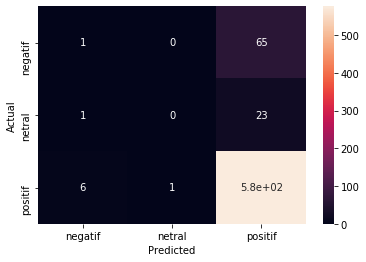

In [17]:
import seaborn as sn

confusion = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion, annot=True)

In [18]:
# # Create XGB Classifier object
# xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 1, objective = "multi:softmax")

# # Create parameter grid
# parameters = {"learning_rate": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 2, 3, 4, 6],
#                "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20],
#                "colsample_bytree": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#                "subsample": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#                "reg_alpha": [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5, 4, 5],
#                "min_child_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#                "n_estimators": [100, 250, 500, 1000],
#                "num_boost_round": [100, 250, 500, 750, 1000]}

# from sklearn.model_selection import RandomizedSearchCV
# # Create RandomizedSearchCV Object
# xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
#                              cv = 10, verbose = 3, random_state = 40 )
           
# # Fit the model
# model_xgboost = xgb_rscv.fit(X_train_vector, y_train)

# # Model best estimators
# print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
# print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
# print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
# print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
# print("Colsample Bytree: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
# print("Colsample Bylevel: ", model_xgboost.best_estimator_.get_params()["colsample_bylevel"])
# print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
# print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
# print("Min Child Weight: ", model_xgboost.best_estimator_.get_params()["min_child_weight"])
# print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])
# print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])